# Projet : Detection d’Anomalies dans le Trafic Reseau avec LightGBM

## 1. Charger les données
* pandas : Chargement et manipulation des données.
* matplotlib.pyplot & seaborn : Création des visualisations.
* zscore (de scipy.stats) : Détection des valeurs aberrantes.
* pd.read_csv(file_path) : Lecture du fichier CSV en tant que DataFrame df.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# **1. Charger les données
file_path = "data-20221207.csv"
df = pd.read_csv(file_path)



## 2. Visualisation et statistiques descriptives
* df.info() → Affiche les types de données, colonnes et valeurs manquantes.
* df.describe() → Donne des statistiques descriptives des colonnes numériques.


In [14]:
# **2. Visualisation et statistiques descriptives**
print("Informations générales sur les données :")
print(df.info())

print("\nStatistiques descriptives :")
print(df.describe())


Informations générales sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35250 entries, 0 to 35249
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow ID            35250 non-null  object 
 1   Src IP             35250 non-null  object 
 2   Src Port           35250 non-null  int64  
 3   Dst IP             35250 non-null  object 
 4   Dst Port           35250 non-null  int64  
 5   Protocol           35250 non-null  int64  
 6   Timestamp          35250 non-null  object 
 7   Flow Duration      35250 non-null  int64  
 8   Tot Fwd Pkts       35250 non-null  int64  
 9   Tot Bwd Pkts       35250 non-null  int64  
 10  TotLen Fwd Pkts    35250 non-null  float64
 11  TotLen Bwd Pkts    35250 non-null  float64
 12  Fwd Pkt Len Max    35250 non-null  float64
 13  Fwd Pkt Len Min    35250 non-null  float64
 14  Fwd Pkt Len Mean   35250 non-null  float64
 15  Fwd Pkt Len Std    35250 non-

## 3. Étude de la distribution des données
* Histogrammes (sns.histplot) : Visualisation de la distribution des variables.
* bins=50 : Divise les données en 50 intervalles.
* kde=True : Ajoute une courbe de densité pour mieux comprendre la distribution.

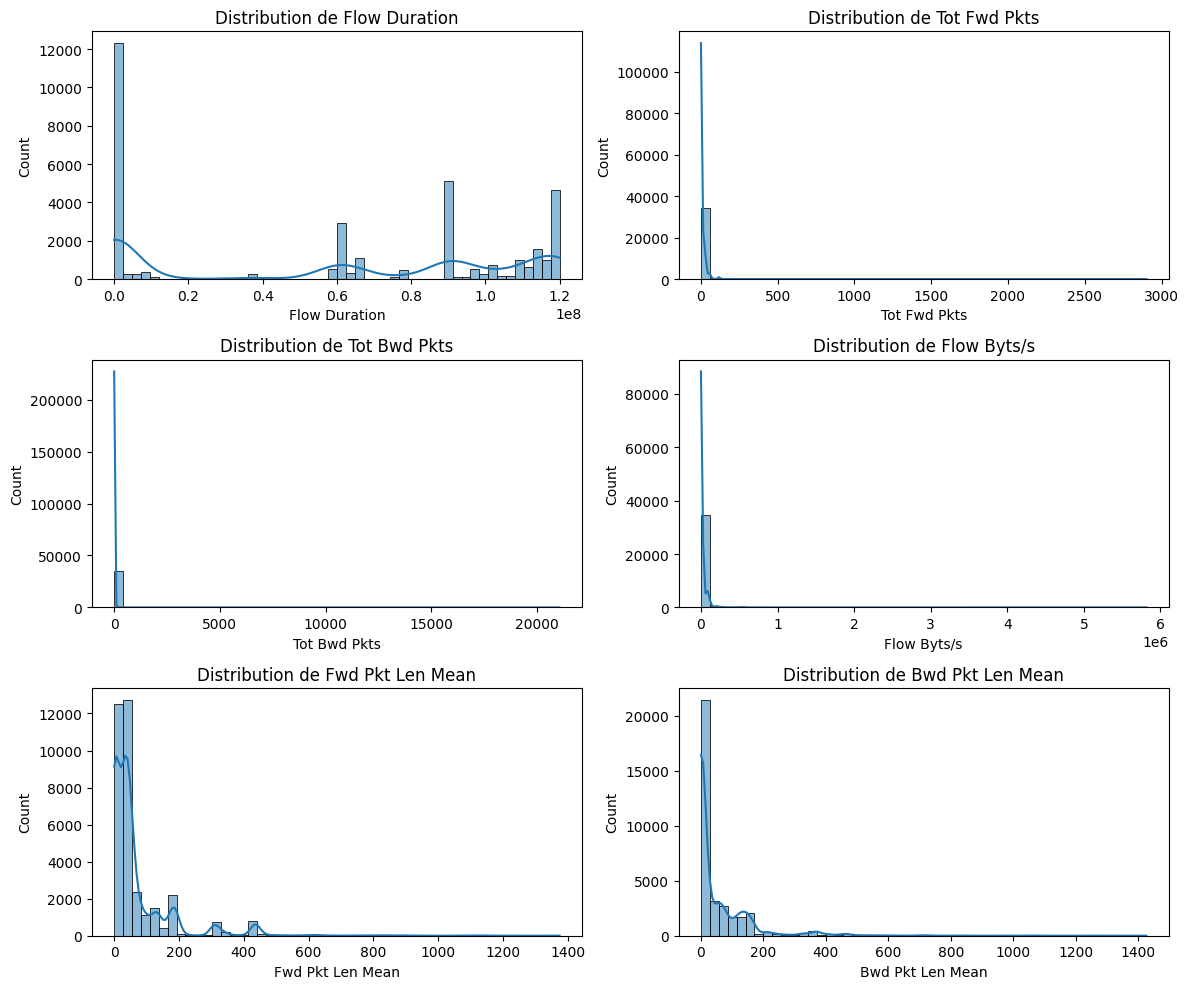

In [15]:
# **3. Étude de la distribution des données**
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.histplot(df['Flow Duration'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution de Flow Duration')

sns.histplot(df['Tot Fwd Pkts'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution de Tot Fwd Pkts')

sns.histplot(df['Tot Bwd Pkts'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution de Tot Bwd Pkts')

sns.histplot(df['Flow Byts/s'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution de Flow Byts/s')

sns.histplot(df['Fwd Pkt Len Mean'], bins=50, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution de Fwd Pkt Len Mean')

sns.histplot(df['Bwd Pkt Len Mean'], bins=50, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution de Bwd Pkt Len Mean')

plt.tight_layout()
plt.show()


## 4. Détection des valeurs aberrantes avec boîtes à moustaches
A) Boîtes à Moustaches
* Boîtes à moustaches (sns.boxplot) : Détection visuelle des valeurs aberrantes.
* Les points au-delà des moustaches sont des valeurs atypiques.

B) Détection avec Z-score & IQR
* Z-score : Repère les valeurs situées à plus de 3 écarts-types de la moyenne.
* IQR (Interquartile Range) : Détecte les valeurs en dehors de l’intervalle [Q1 - 1.5*IQR, Q3 + 1.5*IQR].


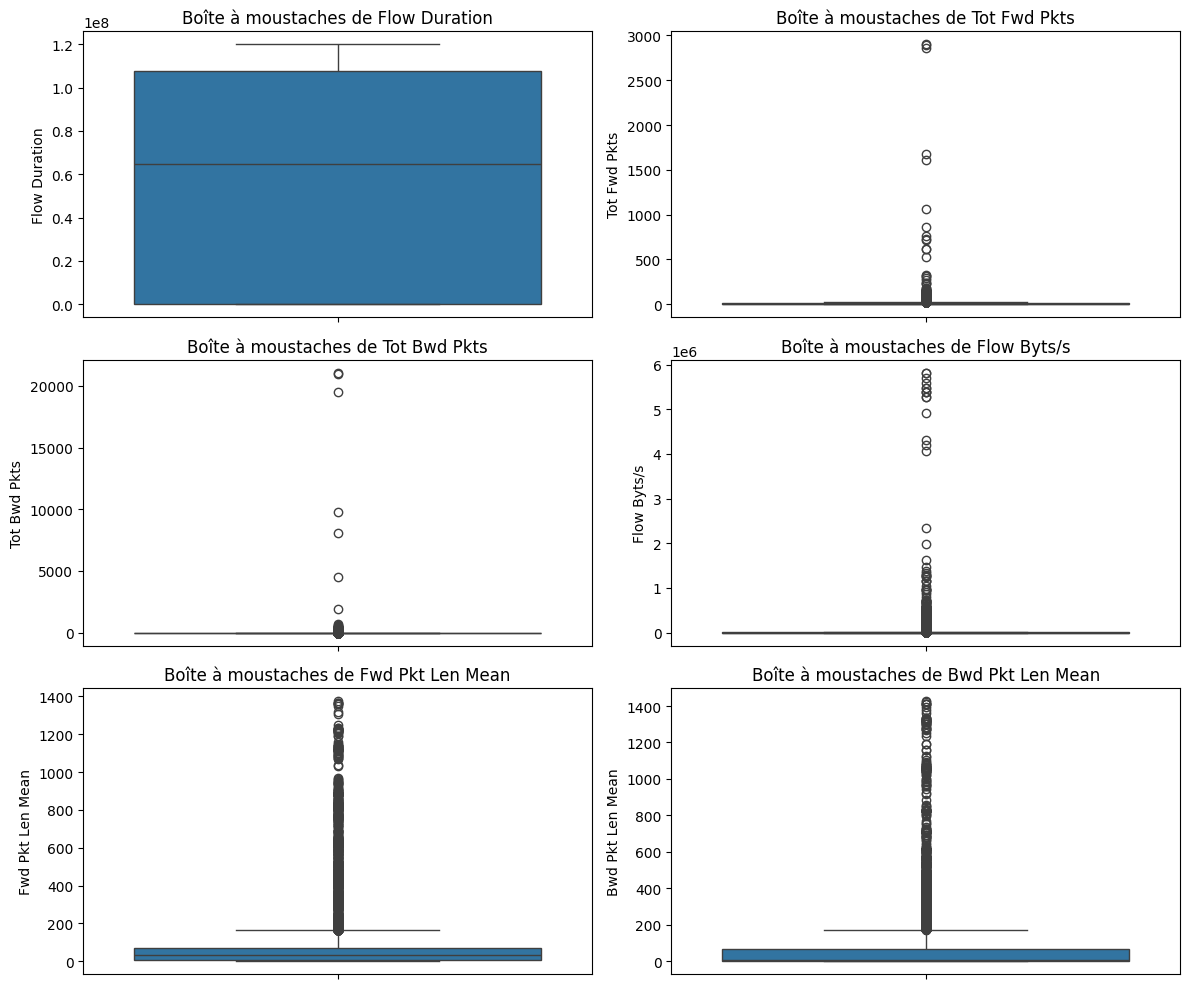


Valeurs aberrantes détectées :
                  Outliers Z-score  Outliers IQR
Flow Duration                    0             0
Tot Fwd Pkts                   241          5569
Tot Bwd Pkts                     9          3952
Flow Byts/s                    187          7577
Fwd Pkt Len Mean              1225          4605
Bwd Pkt Len Mean               763          2397


In [16]:
# **4. Détection des valeurs aberrantes avec boîtes à moustaches**
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.boxplot(y=df['Flow Duration'], ax=axes[0, 0])
axes[0, 0].set_title('Boîte à moustaches de Flow Duration')

sns.boxplot(y=df['Tot Fwd Pkts'], ax=axes[0, 1])
axes[0, 1].set_title('Boîte à moustaches de Tot Fwd Pkts')

sns.boxplot(y=df['Tot Bwd Pkts'], ax=axes[1, 0])
axes[1, 0].set_title('Boîte à moustaches de Tot Bwd Pkts')

sns.boxplot(y=df['Flow Byts/s'], ax=axes[1, 1])
axes[1, 1].set_title('Boîte à moustaches de Flow Byts/s')

sns.boxplot(y=df['Fwd Pkt Len Mean'], ax=axes[2, 0])
axes[2, 0].set_title('Boîte à moustaches de Fwd Pkt Len Mean')

sns.boxplot(y=df['Bwd Pkt Len Mean'], ax=axes[2, 1])
axes[2, 1].set_title('Boîte à moustaches de Bwd Pkt Len Mean')

plt.tight_layout()
plt.show()

# **4. Détection des valeurs aberrantes avec Z-score et IQR**
num_cols = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Flow Byts/s', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Mean']
z_scores = df[num_cols].apply(zscore)

# Seuil de détection des valeurs aberrantes (Z-score > 3 ou < -3)
outliers_zscore = (z_scores.abs() > 3).sum()

# Détection des valeurs aberrantes avec IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

# Résumé des valeurs aberrantes
outliers_summary = pd.DataFrame({'Outliers Z-score': outliers_zscore, 'Outliers IQR': outliers_iqr})
print("\nValeurs aberrantes détectées :")
print(outliers_summary)


## 5. Gestion des Valeurs Manquantes
* df.isnull().sum() : Compte les valeurs manquantes.
* Affiche uniquement les colonnes avec des valeurs nulles.


In [17]:
# **5. Gestion des valeurs manquantes**
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("\nColonnes avec valeurs manquantes :")
    print(missing_values)
else:
    print("\nAucune valeur manquante détectée.")



Aucune valeur manquante détectée.


## 6. Étude exploratoire de la variable cible "Label 
* Compte les occurrences des différentes classes de Label.
* Affiche un barplot (sns.barplot) pour visualiser la répartition des classes.



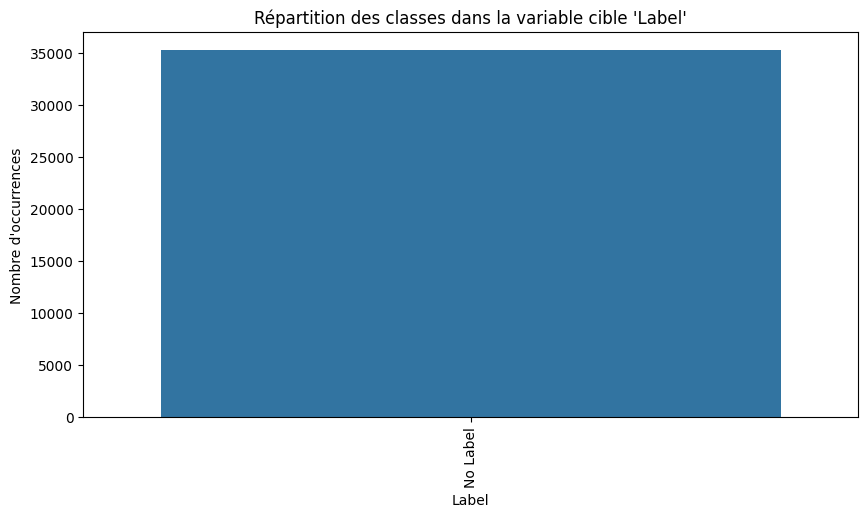

In [18]:
# **6. Étude exploratoire de la variable cible "Label"**
label_counts = df['Label'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.title("Répartition des classes dans la variable cible 'Label'")
plt.xlabel("Label")
plt.ylabel("Nombre d'occurrences")
plt.show()
